<a href="https://colab.research.google.com/github/alexsuakim/Machine-Learning/blob/main/PCA_%26_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCA & Dimensionality Reduction**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #This is for 3d scatter plots.
import math
import random
import os
import scipy
from matplotlib.pyplot import imread
from PIL import Image
np.random.seed(13579201)


There are 3 pedestrian image folders, 'train', 'gallery', and 'val_query'. There are 199 images in 'train' which are used to compute the eigen pedestrians and build the projection matrix. 'Gallery' contains 90 images which belong to 15 different pedestrians. 'Val_query' has 3 images of 3 pedestrians. If two images' file name have same first four digits, then these two images belong to same pedestrian.

(24576, 199)


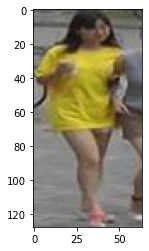

In [ ]:
width = 64
height = 128
dimension = (height, width, 3)
images = []
filename = []
for file in os.listdir("./train"):
    if file.endswith(".jpg"):
        im = imread("./train/" + file)
        im = im.flatten() # flatten im into a vector
        images.append(im)
        filename.append(file)
A_pp = np.stack(images).T # build a matrix where each column is a flattened image
print(A_pp.shape)
plt.imshow(A_pp[:, 0].reshape(dimension))
plt.show()

---
Let $A\_{pp} \in \mathbb{R}^{D \times N}$ be a matrix of data. Each column of $A\_{pp}$ is a sample of data (1 example for instance). The rows of $A\_{pp}$ are thus the features (dimensions) of each of these samples. Complete the function $preprocess(A\_{pp}) = A, Q\_norms, A\_means$, for which:

$$Q_{i,:} = A\_{pp}_{i,:} - \mu_i$$

...where $\mu_i = \frac{1}{m}\sum_j A\_{pp}_{ij}$ .

$$A_{i,:} = \frac{Q_{i,:}}{||Q_{i,:}||_\infty }$$


$A \in \mathbb{R}^{D \times N}$

$Q_{i,:}$ is the $i^{th}$ row of $Q$.

$A_{i,:}$ is the $i^{th}$ row of $A$.

$||Q_{i,:}||_\infty$ is the infinity norm of $Q_{i,:}$.

$Q\_norms \in \mathbb{R}^{D}$ is a vector recording $||Q_{i,:}||_\infty$ for every feature dimension $i$.

$A\_means \in \mathbb{R}^{D}$ is a vector recording $\mu_i$ for every feature dimension $i$.

- If the norm is 0, divide by 1 instead.



In [ ]:
def preprocess(A_pp):

    #shape of input A_pp
    d,n = np.shape(A_pp) # d = 24576, n = 199

    #A_means
    A_means = np.zeros(d)
    for i in range (d):
        A_means[i] = np.average(A_pp[i])


    #Q_norms
    Q = np.zeros((d,n))
    for i in range (d):
        Q[i,:] = A_pp[i,:] / A_means[i]

    Q_norms = np.zeros(d)
    for i in range (d):
        Q_norms[i] = max(abs(Q[i,:]))

    #A
    A = np.zeros((d,n))
    for i in range (d):
        A[i,:] = Q[i,:] / Q_norms[i]

    return A, Q_norms, A_means
    pass



A, Q_norms, A_means = preprocess(A_pp)
print(A)
print(Q_norms)
print(A_means)

[[0.46948357 0.69953052 0.47887324 ... 0.07981221 0.48356808 0.342723  ]
 [0.46261682 0.69626168 0.50934579 ... 0.07943925 0.48130841 0.3364486 ]
 [0.46411483 0.71291866 0.48325359 ... 0.08133971 0.48325359 0.36842105]
 ...
 [0.4745098  0.72156863 0.54901961 ... 0.62745098 0.50196078 0.53333333]
 [0.46850394 0.68897638 0.5511811  ... 0.61811024 0.46062992 0.52755906]
 [0.48780488 0.68292683 0.56097561 ... 0.60162602 0.46747967 0.54878049]]
[2.21007352 2.26943778 2.32976697 ... 1.86199684 1.90215632 1.87901585]
[ 96.37688442  94.29648241  89.70854271 ... 136.94974874 133.53266332
 130.91959799]


---

$A \in \mathbb{R}^{D \times N}$ as above is a matrix of data where every column is a sample of data, and every row is a feature of that data. In this case, we're going to be working with images. Each column $A_{:,j}$ of $A$ is an image of a pedestrian.

"But an image is a square grid with three color channels" you might be thinking. Well, we've simply taken every column of the image and stacked them vertically, converting a 64 column $ \times $ 128 row pixel image with 3 channels into a vector which length is 24576.

Hence $D = 24576$ and we have $N = 199$ images.

Our objective is to describe each image of a pedestrian as a linear combination of other images. These other images are called Eigen Pedestrians. The Eigen Pedestrians, when flattenned into a column vector, is 24576 dimensional. These vectors are the Eigenvectors of the matrix $AA^T$.

---
Use $np.linalg.eig()$ to complete the function $eigen\_person(A) = F, D$.

$D$ is the matrix of eigen values.

$F$ is the eigen pedestrians.


- the columns of $F$ are unit vectors.
- np.cov()
- np.linalg.eig()

---

Orthogonality Check (should be close to 0):  2.7755575615628914e-17
Unit Vector Check:  True
(24576, 199)
(24576,)
Visualise an Eigen Pedestrain:


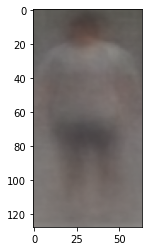

In [ ]:
def eigen_ped(A):

    #shape of input A
    d,n = np.shape(A) # d = 24576, n = 199

    #covarianve matrix A@At
    S = A.T @ A

    #eigenvalues and eigenvectors of S
    val, vec = np.linalg.eig(S)

    #the non-zero eigenvalues of AtA and AAt are the same
    D = np.zeros(d)
    for i in range (n):
        D[i] = val[i]

    #eigenvector of AAt is the eigenvector of AtA left multiplied by A
    F = A @ vec

    #normalise F for orthogonality @518
    norm =  np.linalg.norm(F, axis = 0)
    for i in range(n):
        F[:,i] = F[:,i] / norm[i]

    return F, D
    pass



#For the purposes of doing this assignment, this code isn't really here. Pretend it's engraved in rock.
F, D = eigen_ped(A)
F_real = np.real(F)
print('Orthogonality Check (should be close to 0): ', F_real[:, 0].T@F_real[:, 1])
print('Unit Vector Check: ', math.isclose(np.linalg.norm(F_real[:,0]), 1))
print(F.shape) # It should be (24576, 199)
print(D.shape) # It should be (24576)

# The visulisation of an Eigen Pedestrain should **look like** a pedestrain.
print('Visualise an Eigen Pedestrain:')
ep = np.rint((F[:,0] * Q_norms + A_means).reshape(dimension)).astype(int)
plt.imshow(ep)
plt.show()

---

We rotated a vector until we found the largest value for the projection of the data onto that vector.

This was the eigen vector corresponding to the largest eigen value of that dataset. It was the "direction of greatest variance".

An eigen value $d_j$ in the $j^{th}$ column of $D$ (the matrix of eigen values), is associated with an eigen vector (or eigen pedestrian) in the $j^{th}$ column $f_j$ of $F$.

The variance of the data in the direction of $f_j$ is exactly $d_j$. So the $\sum_j d_j$ is the total variance of the dataset in all directions.

When we project the dataset onto an eigen pedestrian $f_k$, we "capture" a percentage of this variance $\frac{d_k}{\sum_j d_j}$. For example, if $\sum_j d_j = 100$, and we project our data on to the 2 eigen pedestrians $f_1$ and $f_2$ with corresponding eigen values $d_1 = 19$ and $d_2 = 3$, then we've captured $\frac{22}{100} = 22\%$ of the variance of the dataset.

---

$$reduce\_dimensionality(image\_vector, k, F, D, A\_means, Q\_norms) = compressed\_image, p$$

This function projects an image vector onto the $k$ eigen pedestrians corresponding to the $k$ largest eigen values, and returns the coefficients of the compressed image $compressed\_image$ and the number $p$, which is percentage of variance captured by the $k$ eigen pedestrians.

- $compressed\_image \in \mathbb{R}^{N}$. In the below example, $k=80$, so $compressed\_image$ should have $80$ non-zero elements, and $N-80$ elements which are 0.
- np.eig() automatically orders eigen values for you.
- As a general tip with arrays, remember, writing array = Img will turn array into Img. Instead, us array = Img.copy().

---


In [ ]:
def reduce_dimensionality(image_vector, k, F, D, A_means, Q_norms):

    #length of image_vector is 24576
    #shape of input F
    d,n = np.shape(F) # d = 24576, n = 199

    #p: how much you capture
    p = np.sum(D[:k]) / np.sum(D)

    #pre-process image_vector
    img = (image_vector - A_means) / Q_norms

    #compressed image
    compressed_image = np.zeros(n)
    z = F[:,:k].T @ img
    for i in range (k):
        compressed_image[i] = z[i]


    return compressed_image, p

# Display Code. Leave it alooooooooooone.
Idx = 0
compressed_image, p = reduce_dimensionality(A_pp[:, Idx], 80, F, D, A_means, Q_norms)
print(compressed_image.shape) # should be (199,)
print('Variance Captured:', int(p * 100), '%')

(199,)
Variance Captured: 97 %


Now, we have $compressed\_image$ and eigen pedestrians $F$.

We can represent an image by a linear combination of eigen pedestrians.

$$reconstruct\_image(compressed\_image, F, Q\_norms, A\_means) = R$$

$compressed\_image$ is the feature of an image after dimension reduction.

$F$ is the eigen pedestrians.

$R$ is the reconstructed image. $R \in \mathbb{R}^{128 \times 64 \times 3}$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Compressed Image: 


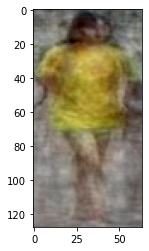

Original Image


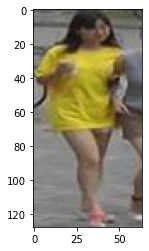

In [ ]:
def reconstruct_image(compressed_image, F, Q_norms, A_means):

    #Rp: reverse dimensionaility reduction
    Rp = compressed_image @ F.T

    #R: full reverse
    R = (Rp * Q_norms + A_means).astype(int) #reverse pre-processing and typecast to integer since RGB = [0,255]
    R = R.reshape((128,64,3)) #reshape

    return R




#Display Code. Leave it alooooooooooone.
R_c = reconstruct_image(compressed_image, F, Q_norms, A_means)
print('Compressed Image: ')
plt.imshow(R_c)
plt.show()
Img = A[:, Idx]
R_o = A_pp[:, Idx].reshape(dimension)
print('Original Image')
plt.imshow(R_o)
plt.show()

# Two images should look similar. The compressed image may be a little more blurry.


$$the\_nearest\_image(query\_image,gallery\_images, k, F, D, A\_means, Q\_norms) = index\_of\_the\_nearest\_image$$

Project an image vector onto the $k$ eigen pedestrians corresponding to the $k$ largest eigen values.
Use this projection for a nearest-neighbour search over all the 90 persons. Returns the index of the nearest image.

The index of the first image is zero.

- $query\_image$ and $gallery\_images$ are not preprocessed.
- First you need to calculate all compressed image, then make search.
- Using Euclidean distance to calculate the distance between two vectors.

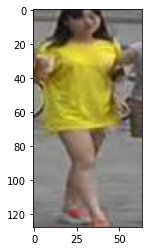

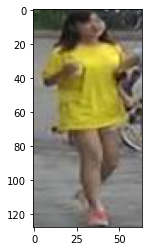

In [ ]:
def the_nearest_image(query_image, gallery_images, k, F, D, A_means, Q_norms):
    # YOUR CODE HERE

    #shape(query_image) = (24576,)
    d, n = np.shape(gallery_images) # d = 24576, n = 90

    #compressed query image
    cQI, p = reduce_dimensionality(query_image, k, F, D, A_means, Q_norms)

    #euclidean distance between vectors of compressed images
    distance = np.zeros(n)
    for i in range (n):
        cGI, p = reduce_dimensionality(gallery_images[:,i], k, F, D, A_means, Q_norms) #compressed gallery image
        distance[i] = np.linalg.norm(cQI - cGI) #euclidean distance

    #find argmin
    ini = np.argmin(distance)

    return ini

# Display Code. Leave it alooooooooooone.
# read a query image
query_image = imread("./val_query/0227_c2s1_046476_01.jpg")
query_image = query_image.flatten()

# read gallery images
gallery_images = []
original_gallery_images = []
filename = []
for file in os.listdir("./gallery"):
    if file.endswith(".jpg"):
        im = imread("./gallery/" + file)
        original_gallery_images.append(im)
        im = im.flatten() # flatten im into a vector
        gallery_images.append(im)
        filename.append(file)

original_gallery_images = np.array(original_gallery_images)
gallery_images = np.stack(gallery_images).T

idx = the_nearest_image(query_image, gallery_images, 80, F, D, A_means, Q_norms)
plt.imshow(query_image.reshape(dimension))
plt.show()
plt.imshow(gallery_images[:, idx].reshape(dimension))
plt.show()


$$image\_similarity\_ranking(image\_gallery, query) = list\_of\_index\_of\_the\_images$$

Image_gallery is the collection of all 90 images with dimension $90 \times 128 \times 64 \times 3$.

Query is one image with dimension $128 \times 64 \times 3$.

The return value should be a list filled with indices. The index should correspond to the sorted gallery images according to their similarities with the query. That is, the first element in the index corresponds to the image with the highest similarity to the query. The second element in the index corresponds to the image with second highest similarity to the query, etc. The length of the result should be 90, same as the number of gallery images. **The indices of the images in the gallery start from zero**.

- Use pixels of images as features.
- Use PCA algorithm you implemented in Task 1.3 to reduce the dimensions of features.
- You are free to tune the dimensions of the features after dimensionality reduction.
- You are free to improve the distance metrics.



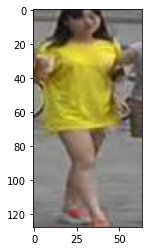

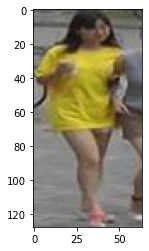

In [ ]:
def image_similarity_ranking(image_gallery, image_query):
    # YOUR CODE HERE

    #set k
    k = 80

    #shape of inputs
    # n = number of images in the gallery = 90
    # r = rows in an image = 128
    # c = columns in an image = 64
    #rgb = colour vector = 3
    n, r, c, rgb = np.shape(image_gallery)
    d = r * c * rgb # dimension = 24576

    #reshape
    imgal = np.zeros((d,n))
    for i in range (n):
        imgal[:,i] = image_gallery[i,:].flatten()
    image_query = image_query.flatten()

    #pre-process
    A, Q_norms, A_means = preprocess(imgal)

    #find eigenvalues and eigenvectors
    F, D = eigen_ped(A)

    #compressed query image
    cQI, p = reduce_dimensionality(image_query, k, F, D, A_means, Q_norms)

    #euclidean distance between vectors of compressed images
    distance = np.zeros(n)
    for i in range (n):
        cGI, p = reduce_dimensionality(imgal[:,i], k, F, D, A_means, Q_norms) #compressed gallery image
        distance[i] = np.linalg.norm(cQI - cGI) #euclidean distance

    #sort indexes
    idx = np.argsort(distance)

    return idx

# Display Code. Leave it alooooooooooone.

id_list = image_similarity_ranking(original_gallery_images, imread("./val_query/0227_c2s1_046476_01.jpg"))

plt.imshow(imread("./val_query/0227_c2s1_046476_01.jpg"))
plt.show()
plt.imshow(original_gallery_images[id_list[0]])
plt.show()

In [ ]:
def match_score(name, rr):
    def reid(idx):
        return filename[rr[idx]][:4]
    base = 0.0
    code = name[:4]
    if reid(0) == code or reid(1) == code or reid(2) == code:
        base += 0.4
        if (reid(0) == code):
            base += 0.3
        elif (reid(1) == code):
            base += 0.2
        elif (reid(2) == code):
            base += 0.1
        if (reid(0) == code and reid(1) == code) or (reid(0) == code and reid(2) == code) or (reid(1) == code and reid(2) == code):
            base += 0.2
            if (reid(0) == code and reid(1) == code and reid(2) == code):
                base += 0.1
    else:
        if (reid(3) == code):
            base += 0.4
        elif (reid(4) == code):
            base += 0.2
    return base

def total_score():
    score = 0
    for file in os.listdir("./val_query"):
        rr = image_similarity_ranking(original_gallery_images, imread("./val_query/" + file))
        #_, rr = the_nearest_image(imread("./test/" + file).flatten(), A_pp, 30, F, D, A_means, Q_norms)
        score += match_score(file, rr)
    return score
total_score()

2.9999999999999996